# Library

In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split


# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score

# Modeling
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import plotly 
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import shap
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

import tensorflow as tf
from tensorflow import keras
import kerastuner as kt
from pycaret.regression import *

# 데이터 불러오기

In [2]:
# 학습용과 평가용(제출용) 데이터를 읽어들인다.
train = pd.read_csv('train_df.csv',encoding='cp949')
test = pd.read_csv('test_df.csv',encoding='cp949')

# 분석에 필요없는 INDEX 필드를 데이터에서 제거
#train_index = train['index']
#test_index = test['index']
#del train['index'], test['index']

# 학습용 정답 데이터를 읽는다.
target = pd.read_csv('train_df.csv',encoding='cp949').INVC_CONT

#submission 데이터를 읽는다.
submission = pd.read_csv('sample_submission.csv')

In [3]:
#시각화 설정
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 15
# 사용자 운영체제 확인
import os
os.name

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [4]:
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT
0,0,1129000014045300,5011000220046300,패션의류,상의,3
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9
3,3,1154500002014200,5011000315087400,식품,농산물,10
4,4,1165000021008300,5011000177051200,식품,가공식품,3


In [5]:
test.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM
0,32000,5013000043028400,1165000021097200,식품,농산물
1,32001,5013000044016100,1154500002066400,식품,농산물
2,32002,5013000205030200,4139000102013200,식품,농산물
3,32003,5013000205030200,4221000040093400,식품,농산물
4,32004,5013000268011400,2726000004017100,식품,농산물


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          32000 non-null  int64 
 1   SEND_SPG_INNB  32000 non-null  int64 
 2   REC_SPG_INNB   32000 non-null  int64 
 3   DL_GD_LCLS_NM  32000 non-null  object
 4   DL_GD_MCLS_NM  32000 non-null  object
 5   INVC_CONT      32000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          4640 non-null   int64 
 1   SEND_SPG_INNB  4640 non-null   int64 
 2   REC_SPG_INNB   4640 non-null   int64 
 3   DL_GD_LCLS_NM  4640 non-null   object
 4   DL_GD_MCLS_NM  4640 non-null   object
dtypes: int64(3), object(2)
memory usage: 181.4+ KB


# Feature Engineering

In [13]:
train = pd.read_csv('train_all.csv')
test = pd.read_csv('test_all.csv')

In [14]:
train = pd.concat([train,target],axis=1)

In [15]:
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,SEND_SPG_NM,SEND_SIGUNGU_NM,SEND_REGION,REC_SPG_NM,REC_SIGUNGU_NM,REC_REGION,INVC_CONT
0,0,1129000014045300,5011000220046300,패션의류,상의,다사6156,성북구,서울,다다1502,제주시,제주,3
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,다사6163,노원구,서울,다다1903,제주시,제주,3
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,다사6158,노원구,서울,다다1001,제주시,제주,9
3,3,1154500002014200,5011000315087400,식품,농산물,다사4541,금천구,서울,다다0600,제주시,제주,10
4,4,1165000021008300,5011000177051200,식품,가공식품,다사5942,서초구,서울,다다1803,제주시,제주,3


In [16]:
train.corr()
#유일한 수치형 변수인 SEND_SPG_INNB와 REC_SPG_INNB가 INVC_CONT와 상관관계가 없다...
#말그대로 택배를 보내는 곳과 받는 곳의 격자공간고유번호를 수치로 표현한 것이기 때문이라 생각
#그러나 SEND_SPG_INNB와와 REC_SPG_INNB사이에는 상관관계가 다소 존재

,index,SEND_SPG_INNB,REC_SPG_INNB,INVC_CONT
index,1.000000,0.008242,-0.002749,-0.006936
SEND_SPG_INNB,0.008242,1.000000,-0.375218,-0.058702
REC_SPG_INNB,-0.002749,-0.375218,1.000000,0.063201
INVC_CONT,-0.006936,-0.058702,0.063201,1.000000


In [17]:
train.sort_values(by='SEND_SPG_INNB')[['SEND_SPG_INNB','SEND_SIGUNGU_NM']]
#격자공간고유번호는 제주도를 기준으로 위도가 상승할수록 증가하는 경향이 있음

,SEND_SPG_INNB,SEND_SIGUNGU_NM
16521,1111000015066100,종로구
8458,1111000017015300,종로구
5187,1111000019090400,종로구
28455,1111000019090400,종로구
7565,1111000019090400,종로구
...,...,...
9067,5013000946025300,서귀포시
6405,5013000946029100,서귀포시
16799,5013000946029100,서귀포시
22009,5013000946029100,서귀포시


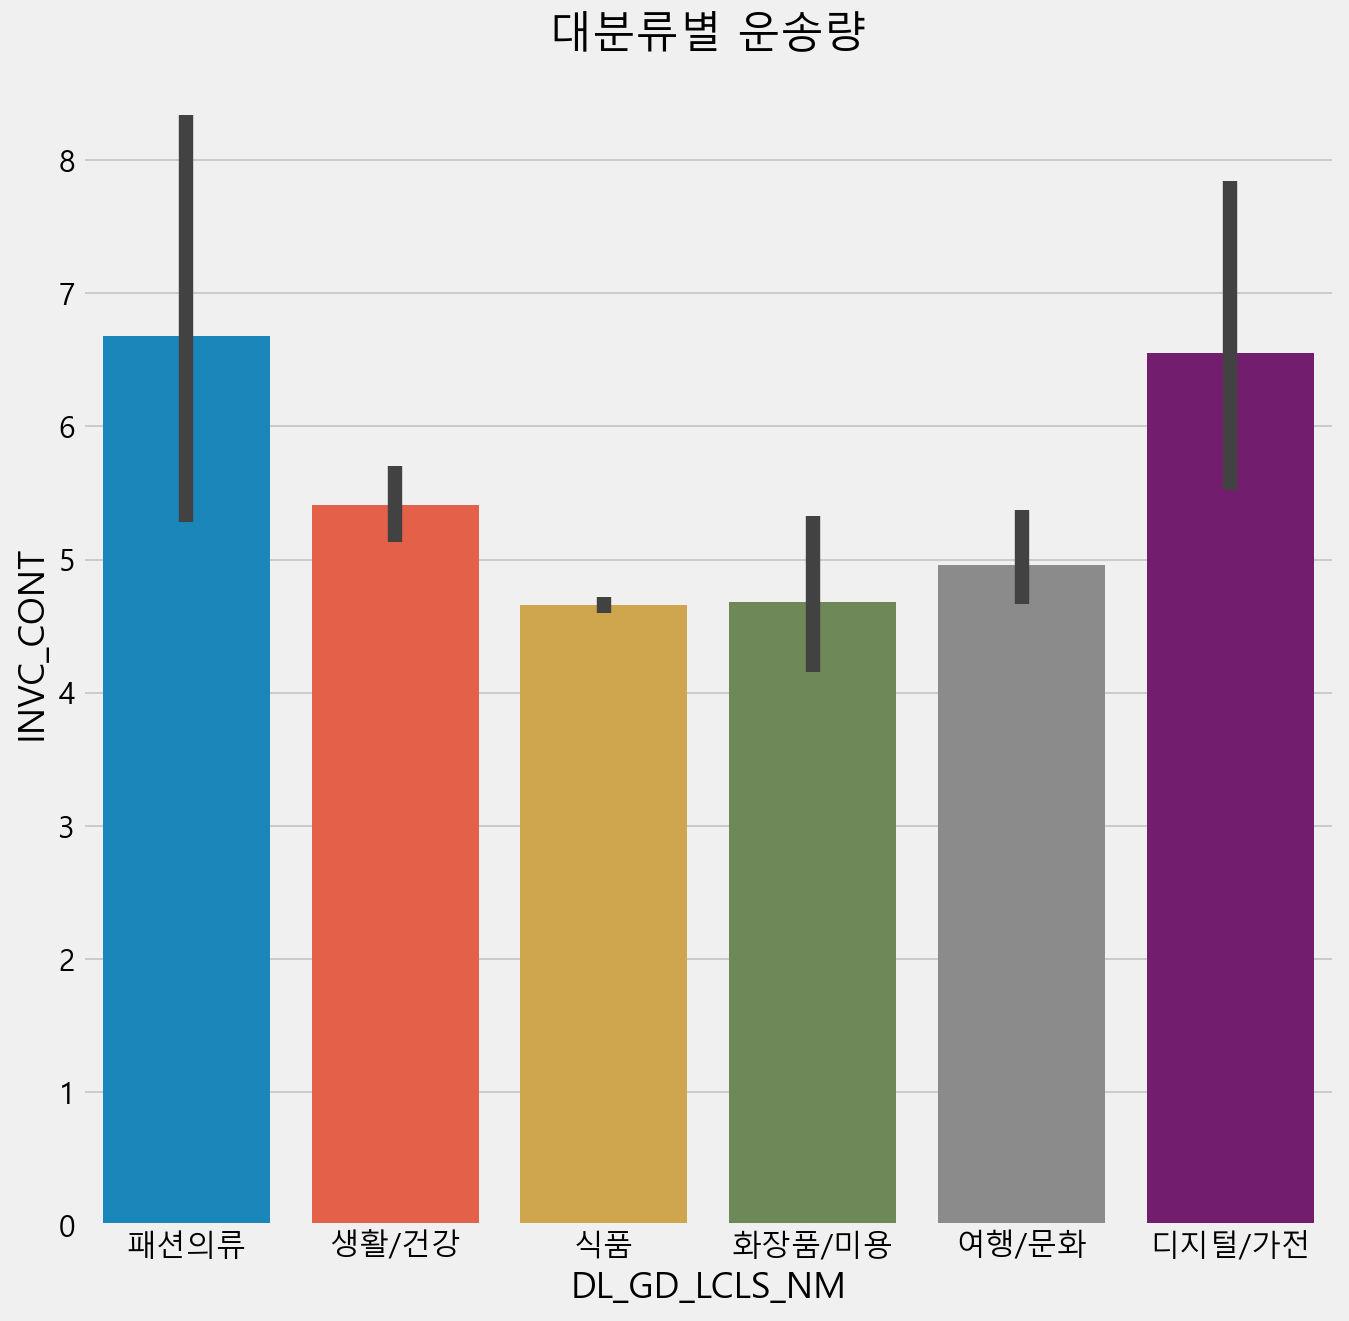

In [18]:
plt.figure(figsize=(10,10))

sns.barplot(x='DL_GD_LCLS_NM',y='INVC_CONT',data=train)
plt.title('대분류별 운송량')
plt.show()
#패션의류나 디지털/가전 대분류 품목의 운송량이 많다.

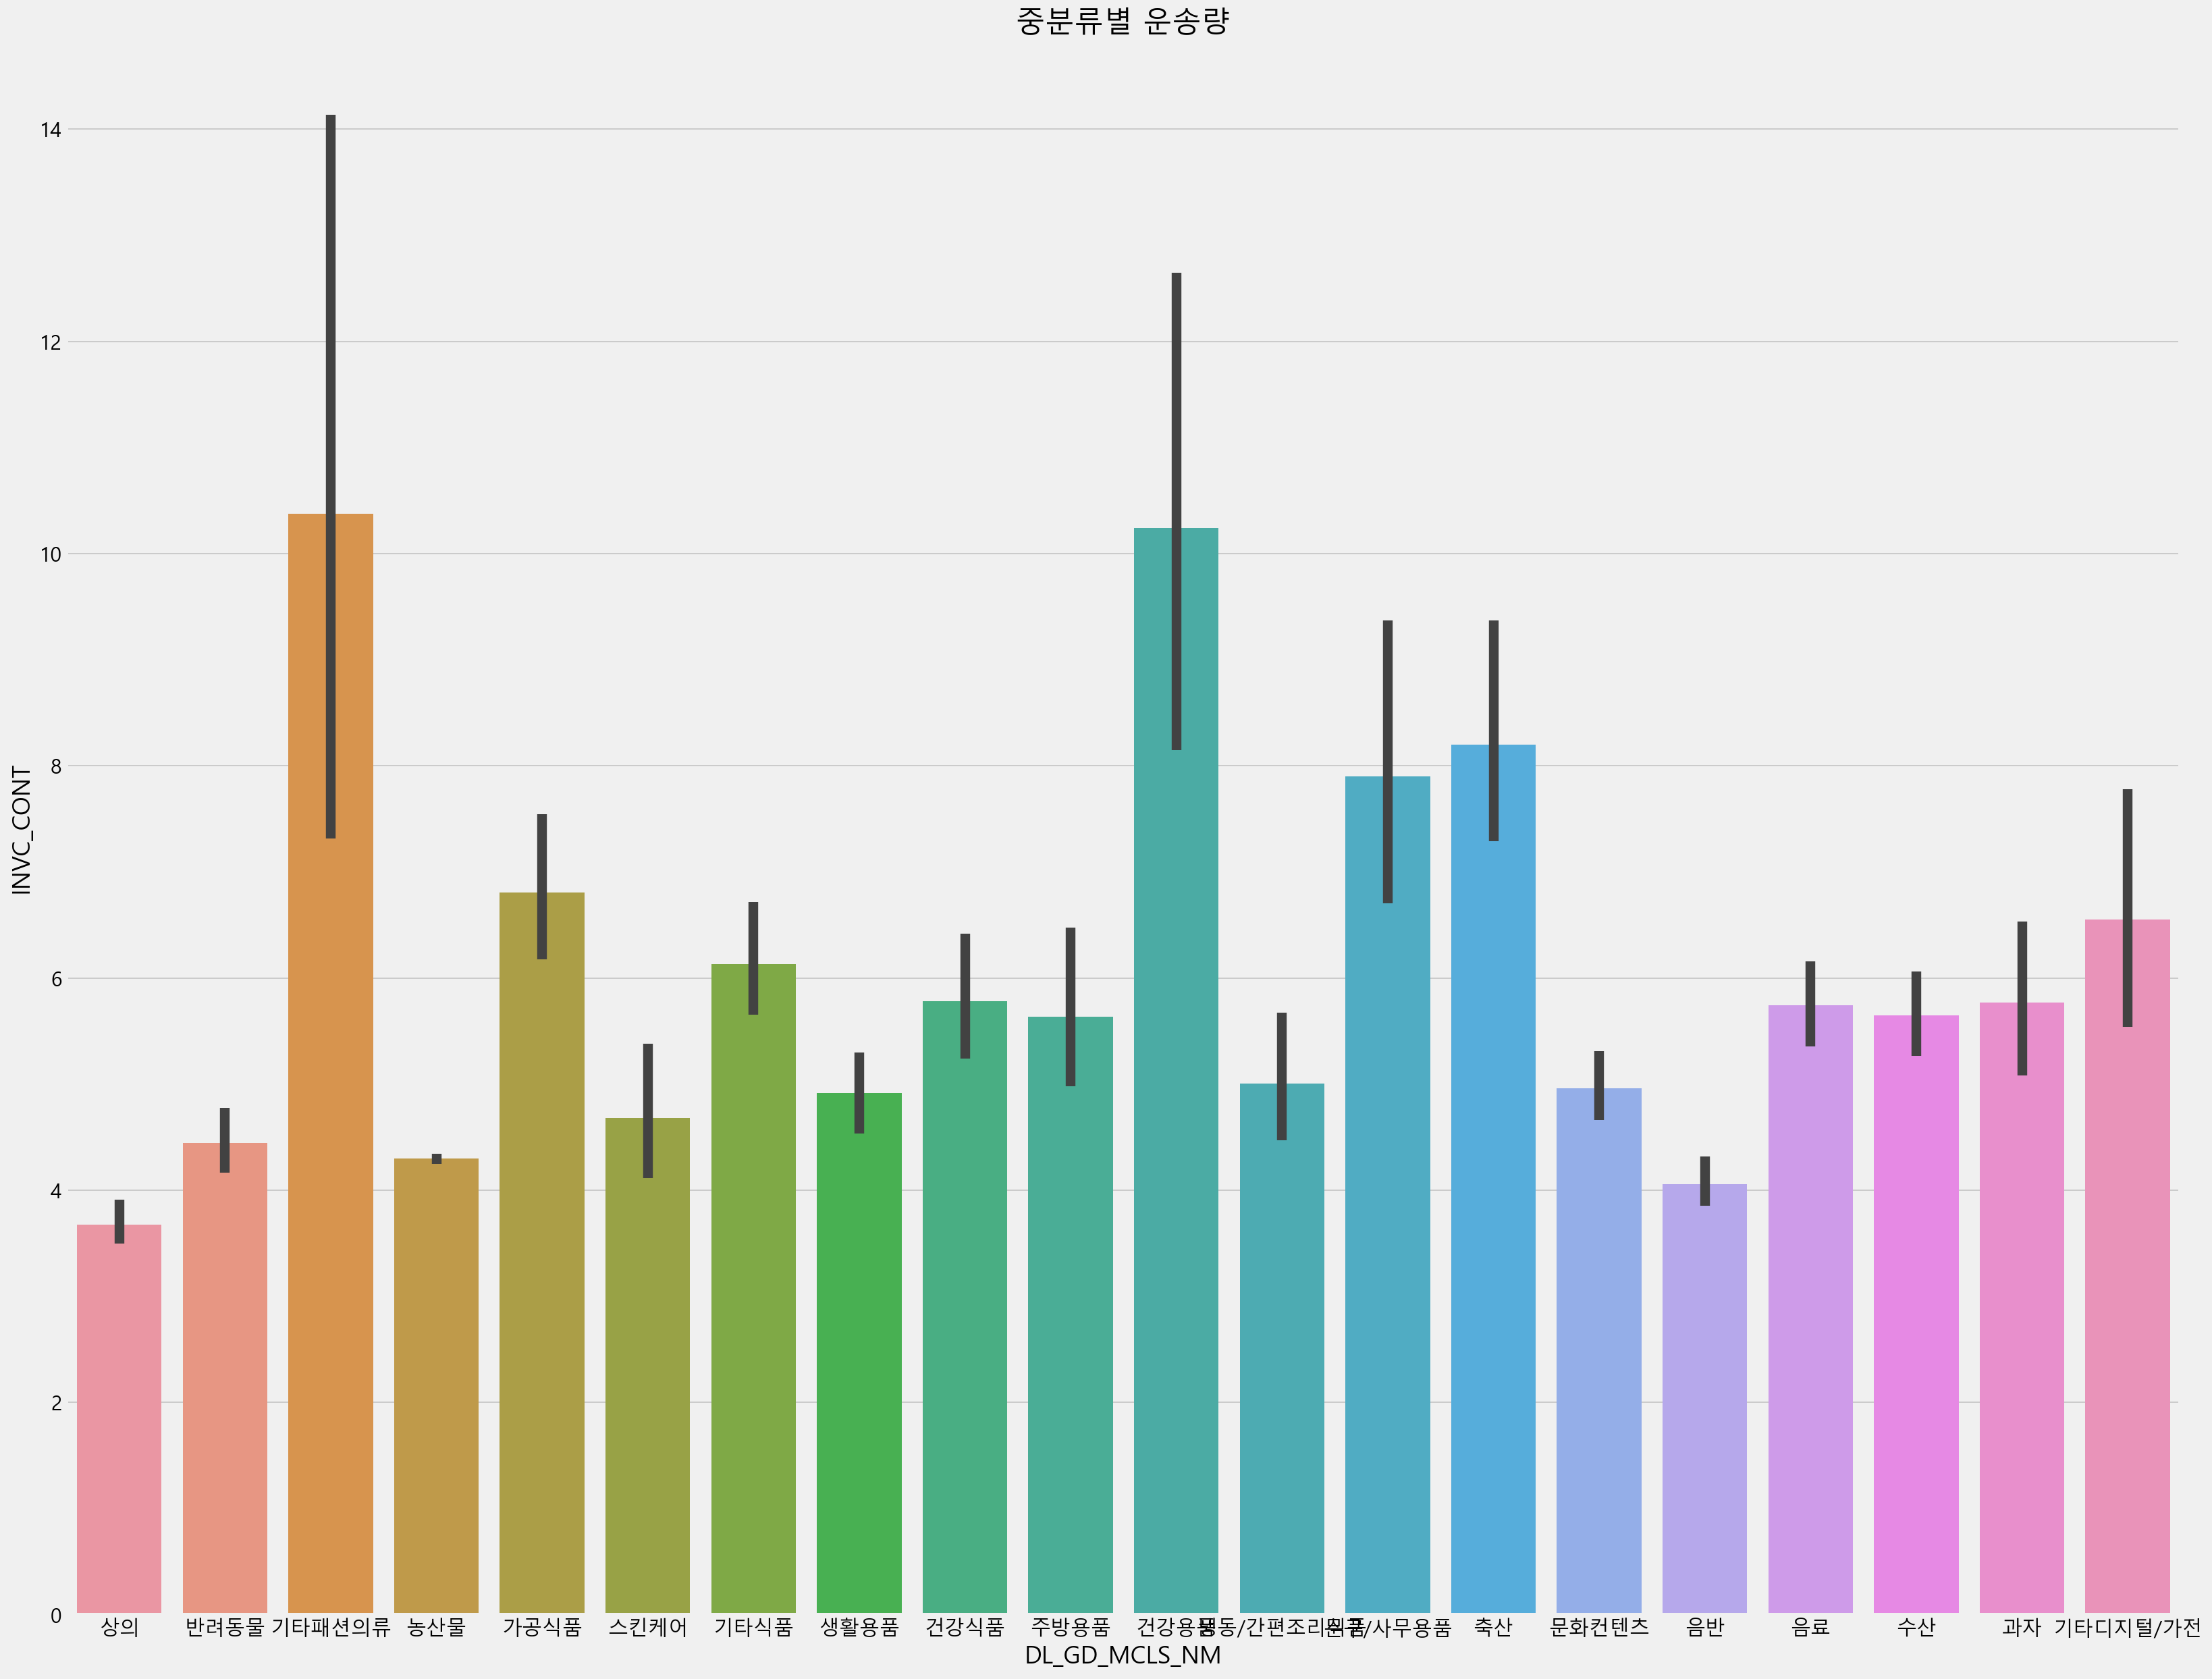

In [19]:
plt.figure(figsize=(25,20))

sns.barplot(x='DL_GD_MCLS_NM',y='INVC_CONT',data=train)
plt.title('중분류별 운송량')
plt.show()
#기타패션의류나 건강용품의 운송량이 많다.
#상의나 음반의 운송량이 적다.

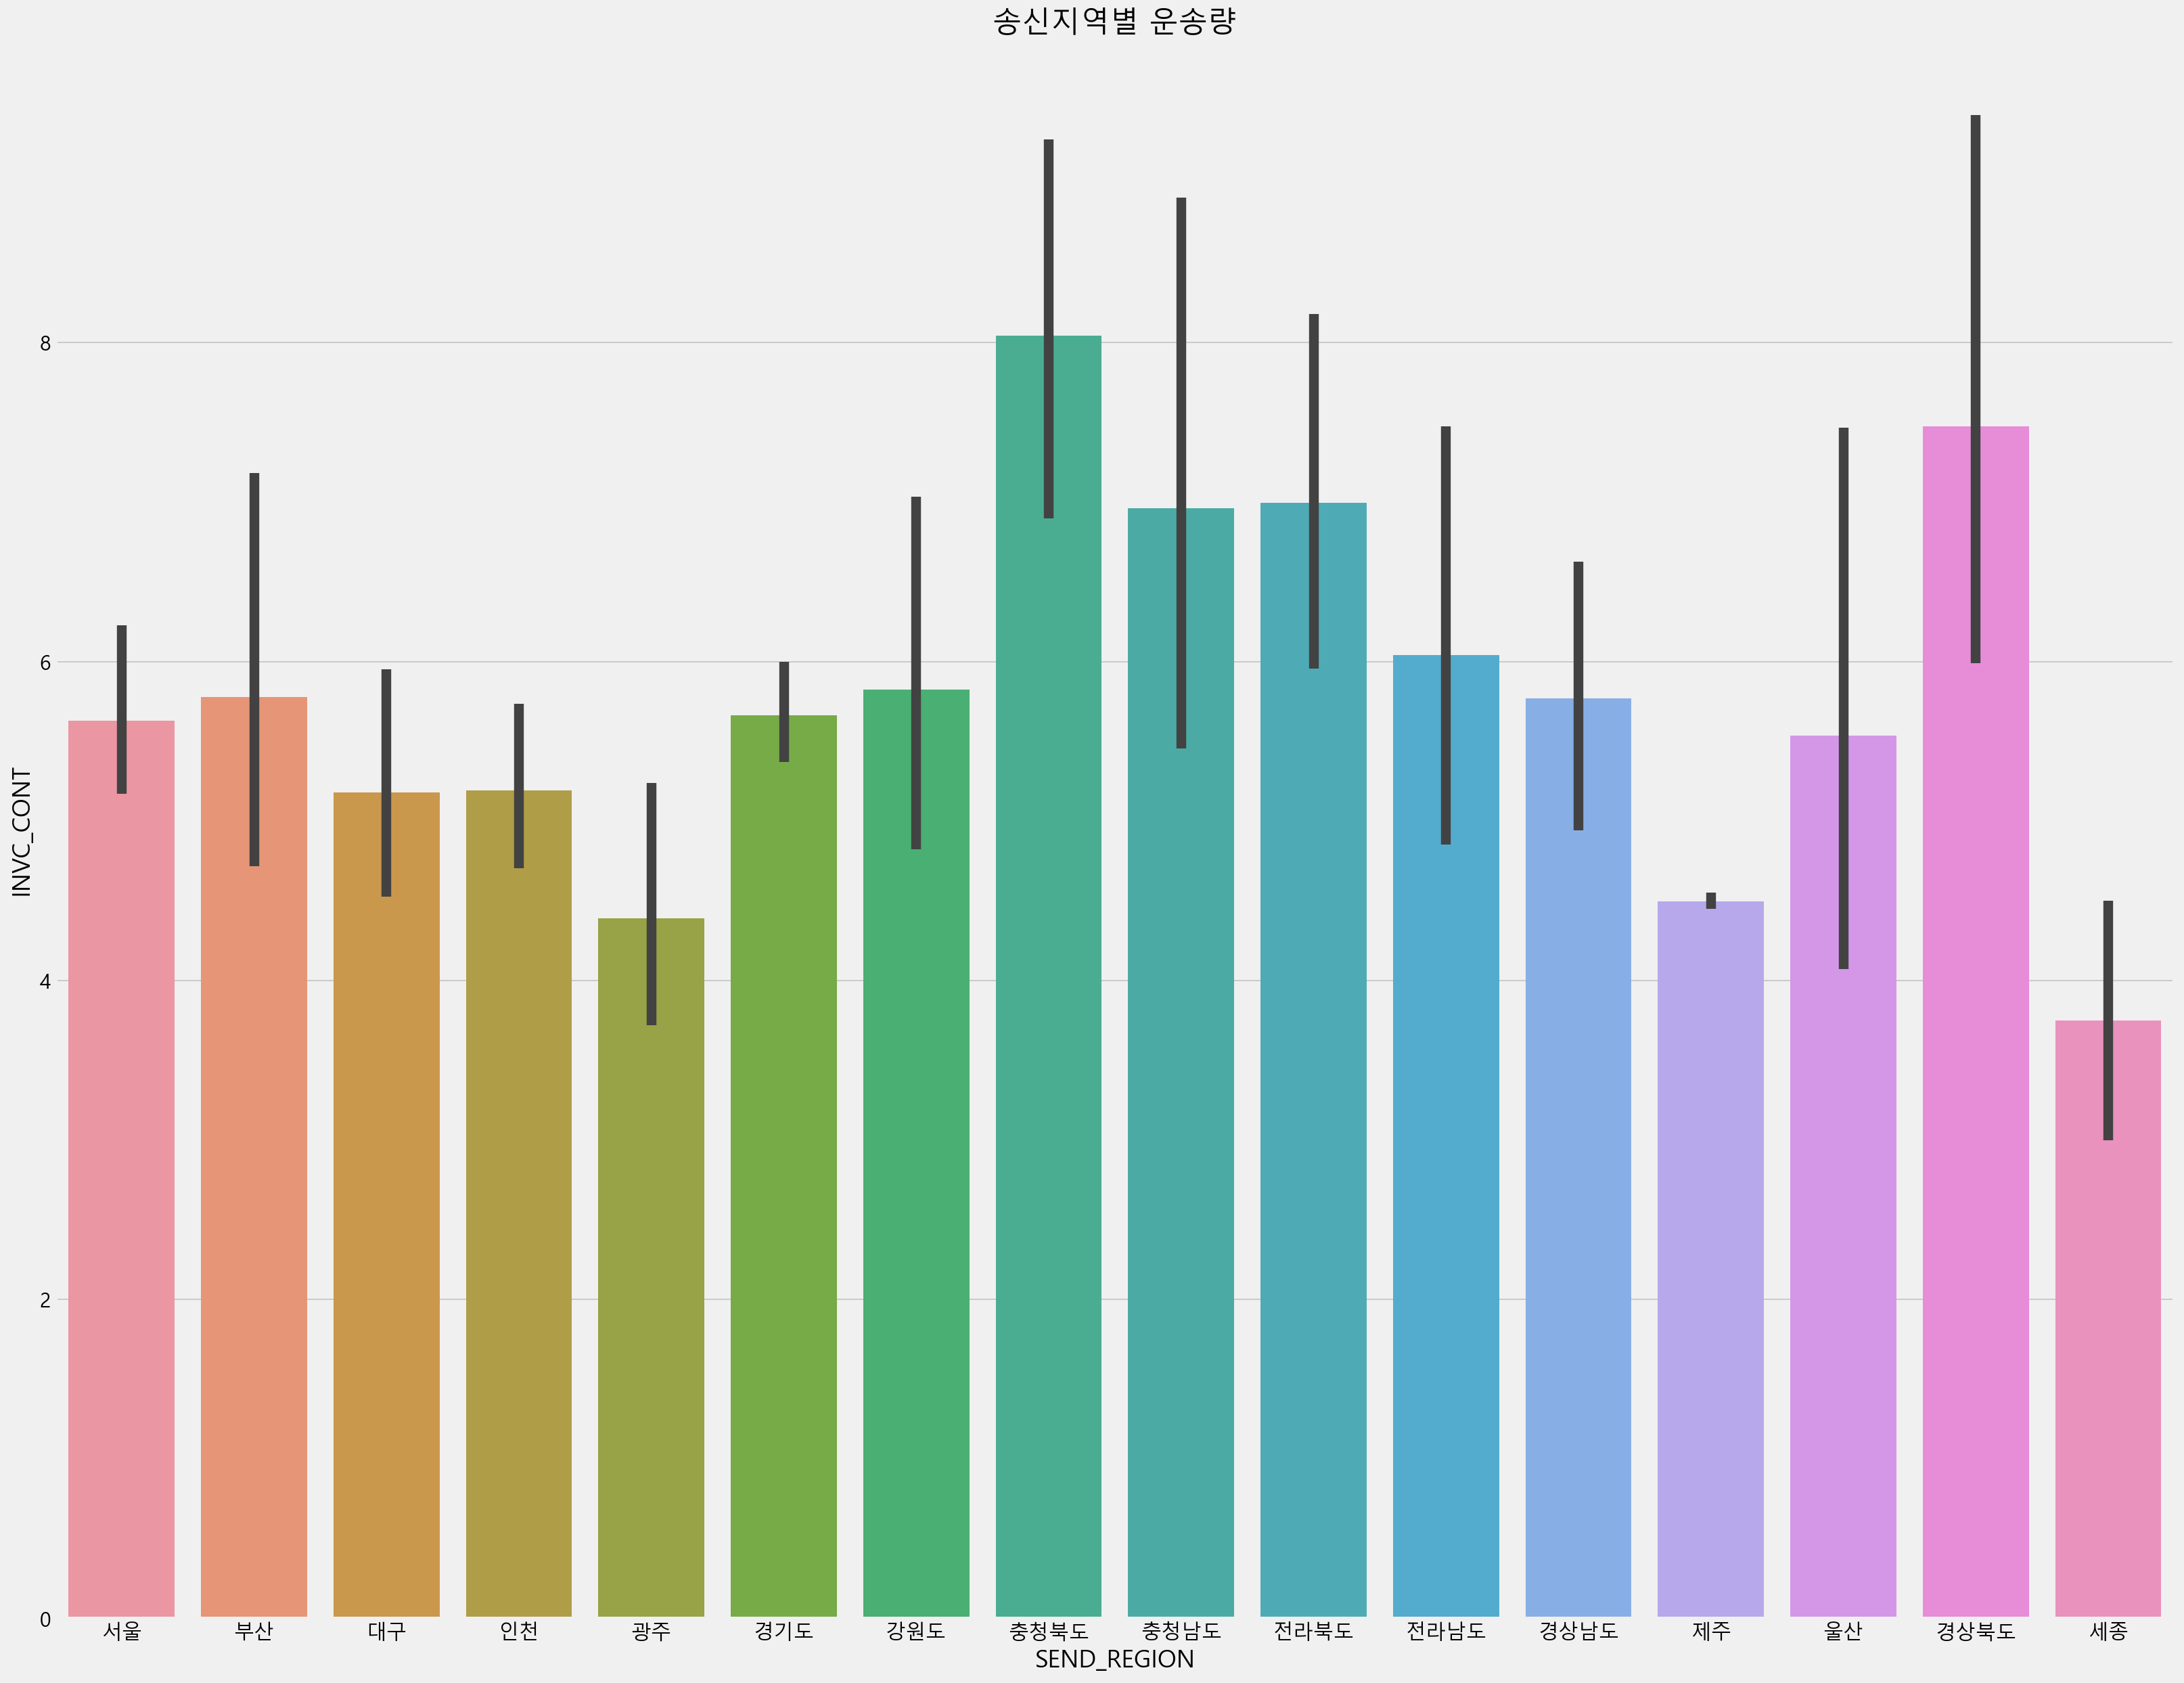

In [20]:
plt.figure(figsize=(25,20))

sns.barplot(x='SEND_REGION',y='INVC_CONT',data=train)
plt.title('송신지역별 운송량')
plt.show()

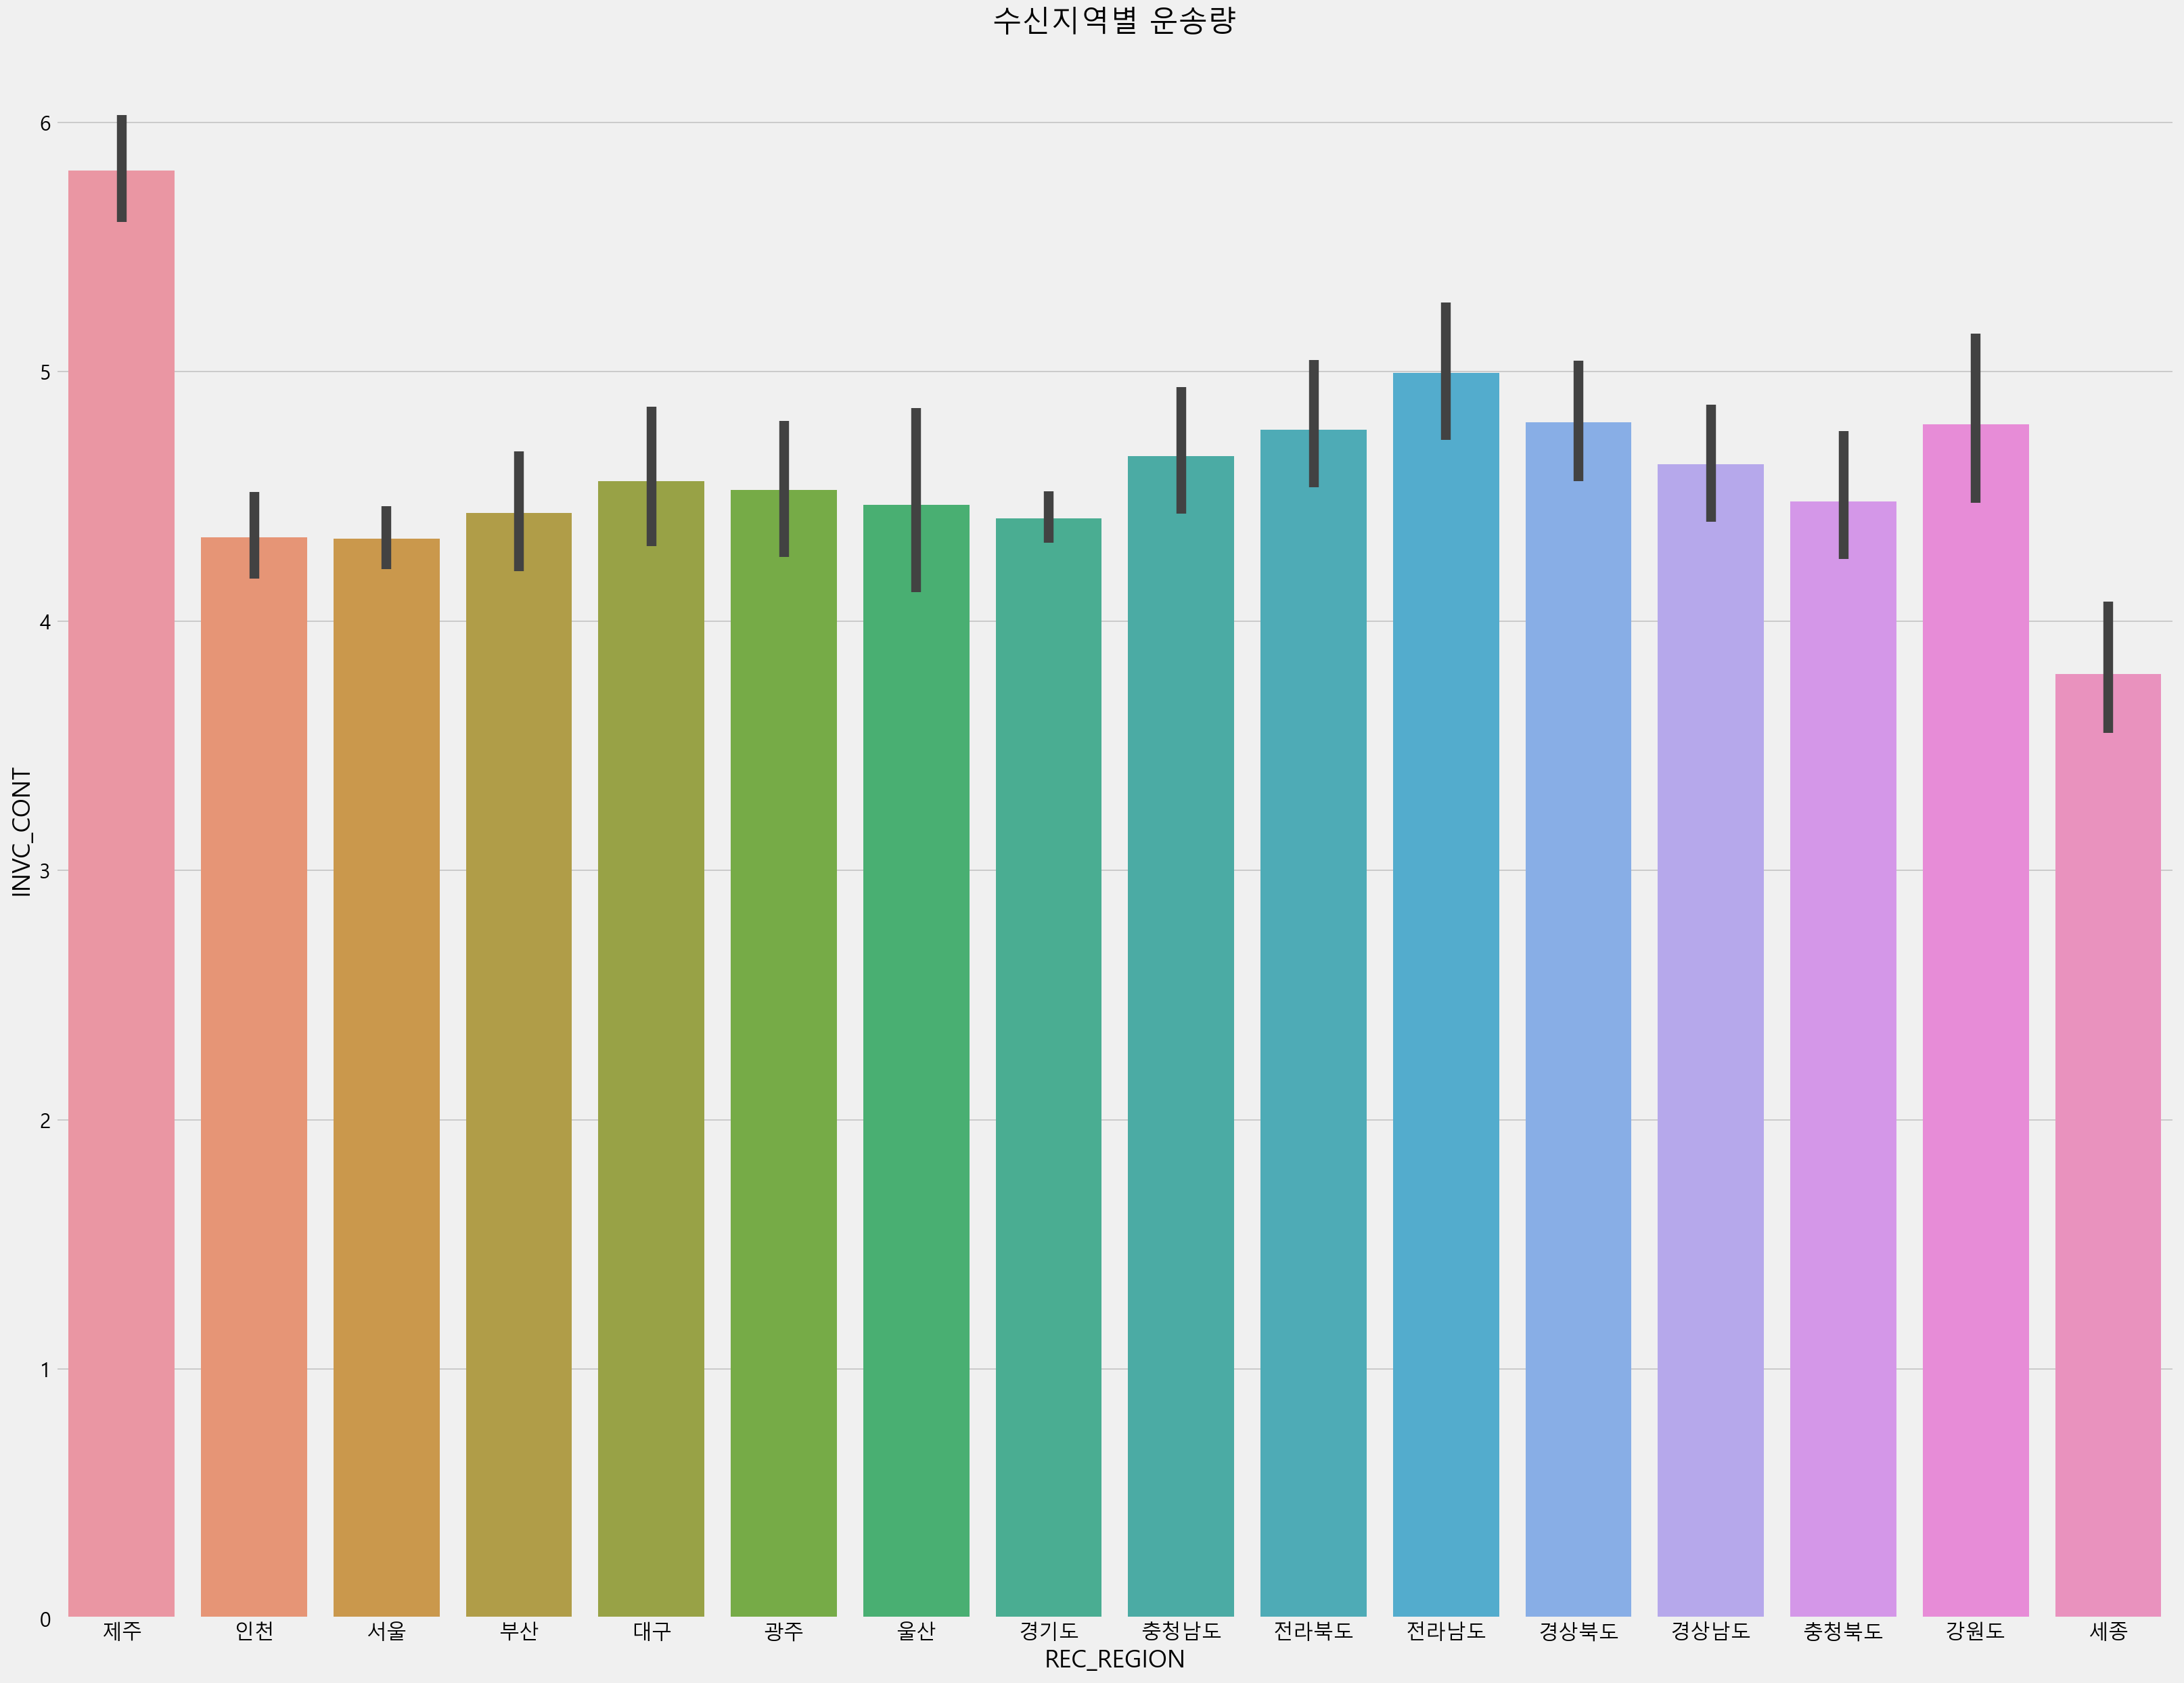

In [21]:
plt.figure(figsize=(25,20))

sns.barplot(x='REC_REGION',y='INVC_CONT',data=train)
plt.title('수신지역별 운송량')
plt.show()

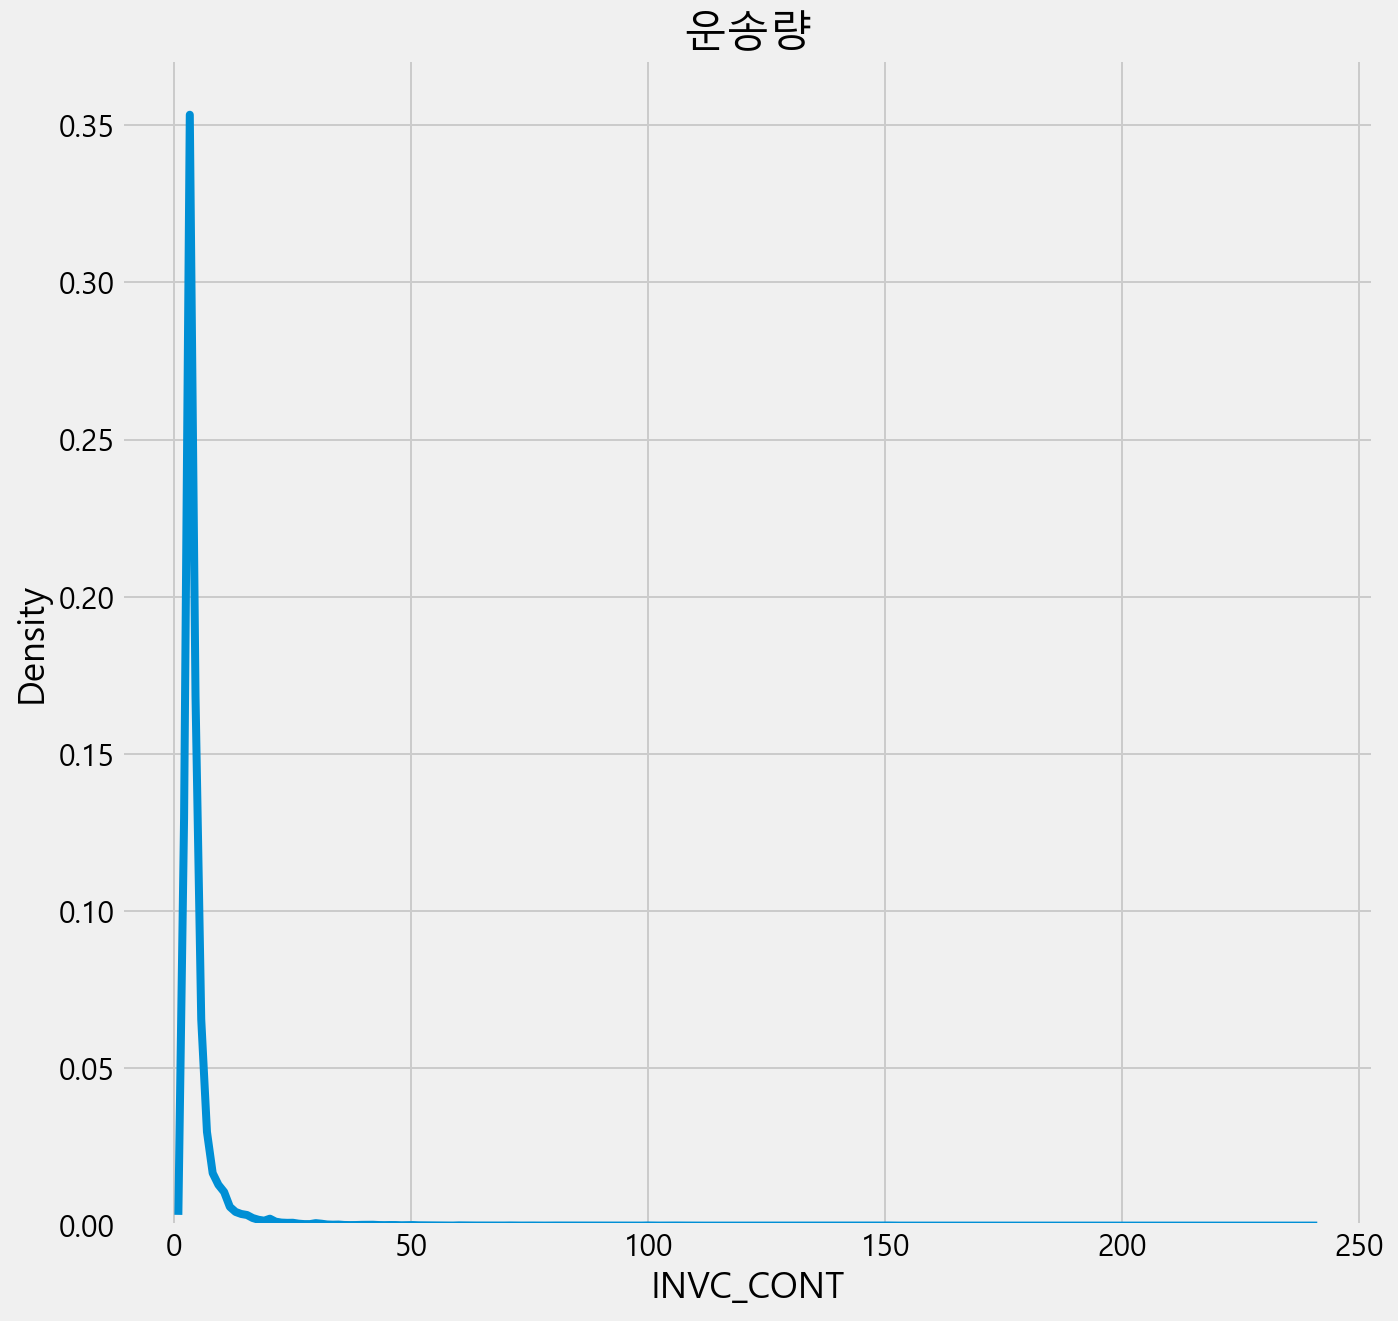

In [22]:
plt.figure(figsize=(10,10))
x = train['INVC_CONT']
sns.kdeplot(x)
plt.title("운송량")
plt.show()

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='INVC_CONT', ylabel='Density'>

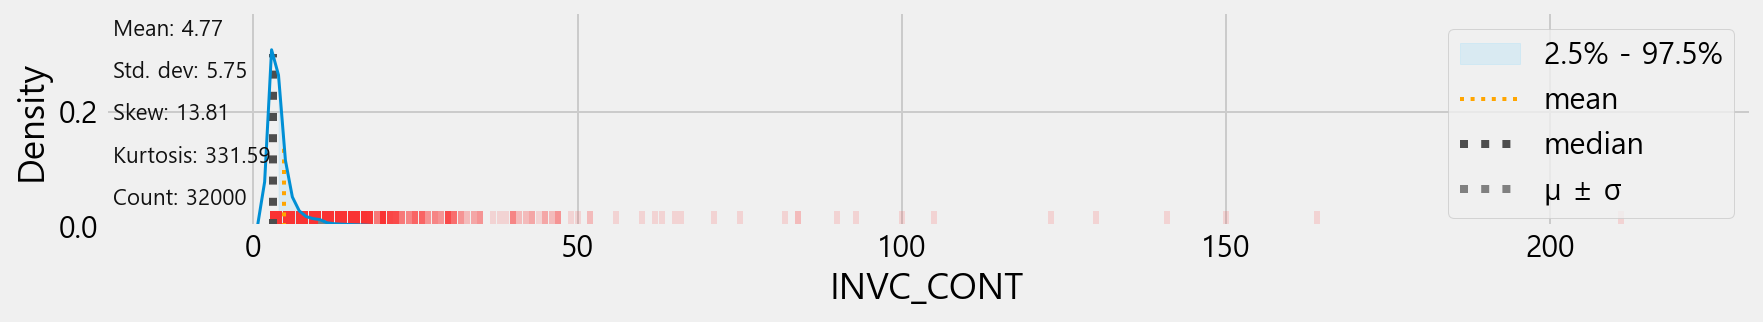

In [23]:
klib.dist_plot(train['INVC_CONT'])

In [24]:
print(train['INVC_CONT'].describe())
#값이 작은쪽으로 치우친 분포를 보임
#정규화가 필요할 수도 있다고 생각

count    32000.000000
mean         4.767875
std          5.752122
min          3.000000
25%          3.000000
50%          3.000000
75%          5.000000
max        239.000000
Name: INVC_CONT, dtype: float64


In [26]:
train['SEND_SPG_INNB'].value_counts()
#5011000078068400가 상대적으로 많음

5011000078068400    4227
5013000610049100    1994
5013000731055200    1335
5011000137030100    1206
5013000821028200     773
                    ... 
1150000024078300       1
4613000577098400       1
5013000668056100       1
4150000213070400       1
4128500029019300       1
Name: SEND_SPG_INNB, Length: 3684, dtype: int64

In [27]:
train['SEND_SPG_INNB_RATIO'] = train.groupby(['SEND_SPG_INNB'])['index'].transform('count') / train.shape[0]

In [28]:
train['REC_SPG_INNB'].value_counts()

5011000543041100    31
5011000596012200    27
5013000635005300    24
5011000318044100    20
5011000544072300    20
                    ..
4161000245010100     1
2811000051074100     1
1123000006020100     1
1168000015051100     1
1130500018038200     1
Name: REC_SPG_INNB, Length: 27826, dtype: int64

In [29]:
train['REC_SPG_INNB_RATIO'] = train.groupby(['REC_SPG_INNB'])['index'].transform('count') / train.shape[0]

In [30]:
train['DL_GD_LCLS_NM'].value_counts()
#식품이 가장 많고 운송량도 균일함

식품        27738
생활/건강      2020
여행/문화      1192
패션의류        582
디지털/가전      241
화장품/미용      227
Name: DL_GD_LCLS_NM, dtype: int64

In [31]:
train['DL_GD_LCLS_NM_RATIO'] = train.groupby(['DL_GD_LCLS_NM'])['index'].transform('count') / train.shape[0]

In [32]:
train['DL_GD_MCLS_NM'].value_counts()
#농산물이 가장 많고 운송량도 균일함

농산물          22162
문화컨텐츠         1192
음료            1126
수산             931
가공식품           923
기타식품           766
건강식품           651
음반             635
축산             418
냉동/간편조리식품      413
반려동물           358
과자             348
생활용품           343
주방용품           328
상의             321
기타패션의류         261
기타디지털/가전       241
스킨케어           227
문구/사무용품        180
건강용품           176
Name: DL_GD_MCLS_NM, dtype: int64

In [33]:
train['DL_GD_MCLS_NM_RATIO'] = train.groupby(['DL_GD_MCLS_NM'])['index'].transform('count') / train.shape[0]

In [34]:
train['SEND_SPG_NM'].value_counts()

다다3007    4254
다나1778    2011
다나2176    1527
다다1804    1232
다나1174     792
          ... 
다사2163       1
다사6630       1
다나3282       1
다다4102       1
다바4399       1
Name: SEND_SPG_NM, Length: 2069, dtype: int64

In [35]:
train['SEND_SPG_NM_RATIO'] = train.groupby(['SEND_SPG_NM'])['index'].transform('count') / train.shape[0]

In [36]:
train['SEND_SIGUNGU_NM'].value_counts()

제주시          14003
서귀포시         11341
파주시           1203
화성시            395
군포시            363
남양주시           272
이천시            270
용인시처인구         241
김포시            209
용산구            175
대덕구            166
광주시            146
북구             117
고양시일산동구        115
서구             101
평택시             81
구로구             78
성북구             77
부천시오정구          76
중구              74
강서구             73
서초구             70
안산시단원구          56
전주시덕진구          50
오산시             49
당진시             47
강남구             47
포천시             45
동구              44
영등포구            43
익산시             43
하남시             42
안산시상록구          42
남구              39
유성구             38
아산시             37
청주시흥덕구          37
노원구             37
안성시             35
종로구             32
원주시             32
청원군             31
양주시             31
성동구             30
고양시덕양구          29
음성군             29
청주시상당구          28
금천구             28
고성군             28
송파구             28
강동구             25
달서구             25
연천군         

In [37]:
train['SEND_SIGUNGU_NM_RATIO'] = train.groupby(['SEND_SIGUNGU_NM'])['index'].transform('count') / train.shape[0]

In [38]:
train['SEND_REGION'].value_counts()

제주      25344
경기도      3950
서울        859
인천        363
부산        187
대구        185
충청북도      184
충청남도      175
경상북도      171
전라북도      163
전라남도      124
강원도       118
경상남도       99
광주         46
울산         28
세종          4
Name: SEND_REGION, dtype: int64

In [39]:
train['SEND_REGION_RATIO'] = train.groupby(['SEND_REGION'])['index'].transform('count') / train.shape[0]

In [40]:
train['REC_SPG_NM'].value_counts()

다나0599    304
다나0699    215
다다0901    201
다다0600    199
다다0500    182
         ... 
다사5884      1
라사1721      1
다사8014      1
다바5292      1
라아4314      1
Name: REC_SPG_NM, Length: 7722, dtype: int64

In [41]:
train['REC_SPG_NM_RATIO'] = train.groupby(['REC_SPG_NM'])['index'].transform('count') / train.shape[0]

In [42]:
train['REC_SIGUNGU_NM'].value_counts()

제주시          5185
서귀포시         1648
서구            701
북구            563
남구            554
화성시           487
중구            444
강남구           416
동구            384
송파구           361
강서구           360
남양주시          336
성남시 분당구       295
서초구           295
남동구           283
시흥시           281
영등포구          276
마포구           261
평택시           261
노원구           254
김해시           252
용인시기흥구        251
의정부시          251
파주시           242
고양시덕양구        242
김포시           230
달서구           227
전주시완산구        221
부천시원미구        221
아산시           219
연수구           214
수원시 영통구       213
관악구           212
양천구           208
해운대구          208
부평구           207
광명시           206
고양시일산동구       204
안산시단원구        204
청주시흥덕구        203
수성구           193
천안시서북구        193
전주시덕진구        192
안양시동안구        191
성북구           189
유성구           184
수원시 권선구       183
구로구           183
세종특별자치시       183
구미시           180
광주시           176
서대문구          176
동대문구          175
원주시           173
강동구           172
용인시수지구    

In [43]:
train['REC_SIGUNGU_NM_RATIO'] = train.groupby(['REC_SIGUNGU_NM'])['index'].transform('count') / train.shape[0]

In [44]:
train['REC_REGION'].value_counts()

경기도     7061
제주      6833
서울      4984
인천      2101
부산      1548
경상남도    1397
충청남도    1193
경상북도    1138
전라북도     942
대구       911
전라남도     885
강원도      874
충청북도     770
광주       636
울산       544
세종       183
Name: REC_REGION, dtype: int64

In [45]:
train['REC_REGION_RATIO'] = train.groupby(['REC_REGION'])['index'].transform('count') / train.shape[0]

In [46]:
train

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,SEND_SPG_NM,SEND_SIGUNGU_NM,SEND_REGION,REC_SPG_NM,REC_SIGUNGU_NM,REC_REGION,INVC_CONT,SEND_SPG_INNB_RATIO,REC_SPG_INNB_RATIO,DL_GD_LCLS_NM_RATIO,DL_GD_MCLS_NM_RATIO,SEND_SPG_NM_RATIO,SEND_SIGUNGU_NM_RATIO,SEND_REGION_RATIO,REC_SPG_NM_RATIO,REC_SIGUNGU_NM_RATIO,REC_REGION_RATIO
0,0,1129000014045300,5011000220046300,패션의류,상의,다사6156,성북구,서울,다다1502,제주시,제주,3,0.002094,0.000063,0.018187,0.010031,0.002094,0.002406,0.026844,0.000906,0.162031,0.213531
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,다사6163,노원구,서울,다다1903,제주시,제주,3,0.000844,0.000031,0.063125,0.011187,0.000844,0.001156,0.026844,0.000031,0.162031,0.213531
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,다사6158,노원구,서울,다다1001,제주시,제주,9,0.000063,0.000031,0.018187,0.008156,0.000125,0.001156,0.026844,0.004281,0.162031,0.213531
3,3,1154500002014200,5011000315087400,식품,농산물,다사4541,금천구,서울,다다0600,제주시,제주,10,0.000031,0.000313,0.866812,0.692562,0.000344,0.000875,0.026844,0.006219,0.162031,0.213531
4,4,1165000021008300,5011000177051200,식품,가공식품,다사5942,서초구,서울,다다1803,제주시,제주,3,0.000031,0.000063,0.866812,0.028844,0.000188,0.002188,0.026844,0.000219,0.162031,0.213531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,31995,5011001060063300,2635000026053400,식품,농산물,나나8483,제주시,제주,마라4789,해운대구,부산,6,0.002344,0.000031,0.866812,0.692562,0.002375,0.437594,0.792000,0.000250,0.006500,0.048375
31996,31996,5011001095042400,1168000017002200,식품,기타식품,나나8581,제주시,제주,다사6044,강남구,서울,5,0.000562,0.000031,0.866812,0.023938,0.001219,0.437594,0.792000,0.000656,0.013000,0.155750
31997,31997,5011001108036200,4119700008012100,식품,농산물,나나8380,제주시,제주,다사3841,부천시소사구,경기도,9,0.001187,0.000031,0.866812,0.692562,0.001563,0.437594,0.792000,0.000406,0.002219,0.220656
31998,31998,5011001115011400,1132000015085100,식품,농산물,나나7779,제주시,제주,다사5861,도봉구,서울,3,0.000188,0.000031,0.866812,0.692562,0.000875,0.437594,0.792000,0.000344,0.003906,0.155750


In [47]:
ratio1 = train[['SEND_SPG_INNB','SEND_SPG_INNB_RATIO']]
ratio1 = ratio1.drop_duplicates()
ratio2 = train[['REC_SPG_INNB','REC_SPG_INNB_RATIO']]
ratio2 = ratio2.drop_duplicates()
ratio3 = train[['DL_GD_LCLS_NM','DL_GD_LCLS_NM_RATIO']]
ratio3 = ratio3.drop_duplicates()
ratio4 = train[['DL_GD_MCLS_NM','DL_GD_MCLS_NM_RATIO']]
ratio4 = ratio4.drop_duplicates()
ratio5 = train[['SEND_SPG_NM','SEND_SPG_NM_RATIO']]
ratio5 = ratio5.drop_duplicates()
ratio6 = train[['SEND_SIGUNGU_NM','SEND_SIGUNGU_NM_RATIO']]
ratio6 = ratio6.drop_duplicates()
ratio7 = train[['SEND_REGION','SEND_REGION_RATIO']]
ratio7 = ratio7.drop_duplicates()
ratio8 = train[['REC_SPG_NM','REC_SPG_NM_RATIO']]
ratio8 = ratio8.drop_duplicates()
ratio9 = train[['REC_SIGUNGU_NM','REC_SIGUNGU_NM_RATIO']]
ratio9 = ratio9.drop_duplicates()
ratio10 = train[['REC_REGION','REC_REGION_RATIO']]
ratio10 = ratio10.drop_duplicates()

In [48]:
test = pd.merge(test, ratio1, how='left', on = 'SEND_SPG_INNB')
test = pd.merge(test, ratio2, how='left', on = 'REC_SPG_INNB')
test = pd.merge(test, ratio3, how='left', on = 'DL_GD_LCLS_NM')
test = pd.merge(test, ratio4, how='left', on = 'DL_GD_MCLS_NM')
test = pd.merge(test, ratio5, how='left', on = 'SEND_SPG_NM')
test = pd.merge(test, ratio6, how='left', on = 'SEND_SIGUNGU_NM')
test = pd.merge(test, ratio7, how='left', on = 'SEND_REGION')
test = pd.merge(test, ratio8, how='left', on = 'REC_SPG_NM')
test = pd.merge(test, ratio9, how='left', on = 'REC_SIGUNGU_NM')
test = pd.merge(test, ratio10, how='left', on ='REC_REGION')

In [49]:
train['SAME_SPG'] = train['SEND_SPG_NM'] == train['REC_SPG_NM']
train['SAME_SPG'] = train['SAME_SPG'].astype(int)
train['SAME_SPG']
#SEND_SPG_NM 과 REC_SPG_NM이 같은 지 여부

0        0
1        0
2        0
3        0
4        0
        ..
31995    0
31996    0
31997    0
31998    0
31999    0
Name: SAME_SPG, Length: 32000, dtype: int32

In [50]:
test['SAME_SPG'] = test['SEND_SPG_NM'] == test['REC_SPG_NM']
test['SAME_SPG'] = test['SAME_SPG'].astype(int)
test['SAME_SPG']

0       0
1       0
2       0
3       0
4       0
       ..
4635    0
4636    0
4637    0
4638    0
4639    0
Name: SAME_SPG, Length: 4640, dtype: int32

In [51]:
train['SAME_SIGUNGU'] = train['SEND_SIGUNGU_NM'] == train['REC_SIGUNGU_NM']
train['SAME_SIGUNGU'] = train['SAME_SIGUNGU'].astype(int)
train['SAME_SIGUNGU']
#SEND_SIGUNGU_NM 과 REC_SIGUNGU_NM 같은 지 여부

0        0
1        0
2        0
3        0
4        0
        ..
31995    0
31996    0
31997    0
31998    0
31999    0
Name: SAME_SIGUNGU, Length: 32000, dtype: int32

In [52]:
test['SAME_SIGUNGU'] = test['SEND_SIGUNGU_NM'] == test['REC_SIGUNGU_NM']
test['SAME_SIGUNGU'] = test['SAME_SIGUNGU'].astype(int)
test['SAME_SIGUNGU']

0       0
1       0
2       0
3       0
4       0
       ..
4635    0
4636    0
4637    0
4638    0
4639    0
Name: SAME_SIGUNGU, Length: 4640, dtype: int32

In [53]:
train['SAME_REGION'] = train['SEND_REGION'] == train['REC_REGION']
train['SAME_REGION'] = train['SAME_REGION'].astype(int)
train['SAME_REGION']
#SEND_REGION 과 REC_REGION 같은 지 여부

0        0
1        0
2        0
3        0
4        0
        ..
31995    0
31996    0
31997    0
31998    0
31999    0
Name: SAME_REGION, Length: 32000, dtype: int32

In [54]:
test['SAME_REGION'] = test['SEND_REGION'] == test['REC_REGION']
test['SAME_REGION'] = test['SAME_REGION'].astype(int)
test['SAME_REGION']

0       0
1       0
2       0
3       0
4       0
       ..
4635    0
4636    0
4637    0
4638    0
4639    0
Name: SAME_REGION, Length: 4640, dtype: int32

In [55]:
train['SAME_INNB'] = train['SEND_SPG_INNB'] == train['REC_SPG_INNB']
train['SAME_INNB'] = train['SAME_INNB'].astype(int)
train['SAME_INNB']
#SEND_SPG_INNB 과 REC_SPG_INNB 같은 지 여부

0        0
1        0
2        0
3        0
4        0
        ..
31995    0
31996    0
31997    0
31998    0
31999    0
Name: SAME_INNB, Length: 32000, dtype: int32

In [56]:
test['SAME_INNB'] = test['SEND_SPG_INNB'] == test['REC_SPG_INNB']
test['SAME_INNB'] = test['SAME_INNB'].astype(int)
test['SAME_INNB']

0       0
1       0
2       0
3       0
4       0
       ..
4635    0
4636    0
4637    0
4638    0
4639    0
Name: SAME_INNB, Length: 4640, dtype: int32

In [57]:
train['SAME_TOTAL'] = train['SAME_SPG'] + train['SAME_SIGUNGU'] + train['SAME_REGION'] + train['SAME_INNB'] 
train['SAME_TOTAL'] = train['SAME_TOTAL'].astype(int)
train['SAME_TOTAL']
#여부 변수 총합

0        0
1        0
2        0
3        0
4        0
        ..
31995    0
31996    0
31997    0
31998    0
31999    0
Name: SAME_TOTAL, Length: 32000, dtype: int32

In [58]:
test['SAME_TOTAL'] = test['SAME_SPG'] + test['SAME_SIGUNGU'] + test['SAME_REGION'] + test['SAME_INNB'] 
test['SAME_TOTAL'] = test['SAME_TOTAL'].astype(int)
test['SAME_TOTAL']

0       0
1       0
2       0
3       0
4       0
       ..
4635    0
4636    0
4637    0
4638    0
4639    0
Name: SAME_TOTAL, Length: 4640, dtype: int32

In [59]:
train

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,SEND_SPG_NM,SEND_SIGUNGU_NM,SEND_REGION,REC_SPG_NM,REC_SIGUNGU_NM,REC_REGION,INVC_CONT,SEND_SPG_INNB_RATIO,REC_SPG_INNB_RATIO,DL_GD_LCLS_NM_RATIO,DL_GD_MCLS_NM_RATIO,SEND_SPG_NM_RATIO,SEND_SIGUNGU_NM_RATIO,SEND_REGION_RATIO,REC_SPG_NM_RATIO,REC_SIGUNGU_NM_RATIO,REC_REGION_RATIO,SAME_SPG,SAME_SIGUNGU,SAME_REGION,SAME_INNB,SAME_TOTAL
0,0,1129000014045300,5011000220046300,패션의류,상의,다사6156,성북구,서울,다다1502,제주시,제주,3,0.002094,0.000063,0.018187,0.010031,0.002094,0.002406,0.026844,0.000906,0.162031,0.213531,0,0,0,0,0
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,다사6163,노원구,서울,다다1903,제주시,제주,3,0.000844,0.000031,0.063125,0.011187,0.000844,0.001156,0.026844,0.000031,0.162031,0.213531,0,0,0,0,0
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,다사6158,노원구,서울,다다1001,제주시,제주,9,0.000063,0.000031,0.018187,0.008156,0.000125,0.001156,0.026844,0.004281,0.162031,0.213531,0,0,0,0,0
3,3,1154500002014200,5011000315087400,식품,농산물,다사4541,금천구,서울,다다0600,제주시,제주,10,0.000031,0.000313,0.866812,0.692562,0.000344,0.000875,0.026844,0.006219,0.162031,0.213531,0,0,0,0,0
4,4,1165000021008300,5011000177051200,식품,가공식품,다사5942,서초구,서울,다다1803,제주시,제주,3,0.000031,0.000063,0.866812,0.028844,0.000188,0.002188,0.026844,0.000219,0.162031,0.213531,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,31995,5011001060063300,2635000026053400,식품,농산물,나나8483,제주시,제주,마라4789,해운대구,부산,6,0.002344,0.000031,0.866812,0.692562,0.002375,0.437594,0.792000,0.000250,0.006500,0.048375,0,0,0,0,0
31996,31996,5011001095042400,1168000017002200,식품,기타식품,나나8581,제주시,제주,다사6044,강남구,서울,5,0.000562,0.000031,0.866812,0.023938,0.001219,0.437594,0.792000,0.000656,0.013000,0.155750,0,0,0,0,0
31997,31997,5011001108036200,4119700008012100,식품,농산물,나나8380,제주시,제주,다사3841,부천시소사구,경기도,9,0.001187,0.000031,0.866812,0.692562,0.001563,0.437594,0.792000,0.000406,0.002219,0.220656,0,0,0,0,0
31998,31998,5011001115011400,1132000015085100,식품,농산물,나나7779,제주시,제주,다사5861,도봉구,서울,3,0.000188,0.000031,0.866812,0.692562,0.000875,0.437594,0.792000,0.000344,0.003906,0.155750,0,0,0,0,0


In [60]:
test

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,SEND_SPG_NM,SEND_SIGUNGU_NM,SEND_REGION,REC_SPG_NM,REC_SIGUNGU_NM,REC_REGION,SEND_SPG_INNB_RATIO,REC_SPG_INNB_RATIO,DL_GD_LCLS_NM_RATIO,DL_GD_MCLS_NM_RATIO,SEND_SPG_NM_RATIO,SEND_SIGUNGU_NM_RATIO,SEND_REGION_RATIO,REC_SPG_NM_RATIO,REC_SIGUNGU_NM_RATIO,REC_REGION_RATIO,SAME_SPG,SAME_SIGUNGU,SAME_REGION,SAME_INNB,SAME_TOTAL
0,32000,5013000043028400,1165000021097200,식품,농산물,다나4294,서귀포시,제주,다사5942,서초구,서울,0.000906,NaN,0.866812,0.692562,0.001937,0.354406,0.792,0.000250,0.009219,0.155750,0,0,0,0,0
1,32001,5013000044016100,1154500002066400,식품,농산물,다나4394,서귀포시,제주,다사4541,금천구,서울,0.000562,0.000031,0.866812,0.692562,0.000562,0.354406,0.792,0.000188,0.003219,0.155750,0,0,0,0,0
2,32002,5013000205030200,4139000102013200,식품,농산물,다나4187,서귀포시,제주,다사3029,시흥시,경기도,0.001125,0.000031,0.866812,0.692562,0.001813,0.354406,0.792,0.000469,0.008781,0.220656,0,0,0,0,0
3,32003,5013000205030200,4221000040093400,식품,농산물,다나4187,서귀포시,제주,라아9121,속초시,강원도,0.001125,NaN,0.866812,0.692562,0.001813,0.354406,0.792,NaN,0.002312,0.027312,0,0,0,0,0
4,32004,5013000268011400,2726000004017100,식품,농산물,다나3285,서귀포시,제주,마마0564,수성구,대구,0.000281,NaN,0.866812,0.692562,0.000344,0.354406,0.792,0.000063,0.006031,0.028469,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,36635,5013000858004400,4725000719072200,식품,농산물,다나0473,서귀포시,제주,라바5923,상주시,경상북도,0.001594,0.000031,0.866812,0.692562,0.004469,0.354406,0.792,0.000156,0.001281,0.035562,0,0,0,0,0
4636,36636,5013000870018300,2826000106075300,식품,농산물,다나1673,서귀포시,제주,다사2548,서구,인천,0.000719,NaN,0.866812,0.692562,0.001094,0.354406,0.792,0.000500,0.021906,0.065656,0,0,0,0,0
4637,36637,5013000897086300,4311100034004300,식품,농산물,나나9472,서귀포시,제주,다바9950,청주시상당구,충청북도,0.000438,NaN,0.866812,0.692562,0.000469,0.354406,0.792,0.000063,0.003531,0.024063,0,0,0,0,0
4638,36638,5013000902065100,4145000013011200,식품,농산물,다나0472,서귀포시,제주,다사7250,하남시,경기도,0.000969,NaN,0.866812,0.692562,0.002188,0.354406,0.792,0.000219,0.003844,0.220656,0,0,0,0,0


In [61]:
train.drop(columns=['INVC_CONT'],inplace=True)

In [62]:
train_ratio = train.iloc[:,11:21]
test_ratio = test.iloc[:,11:21]

In [63]:
train = pd.read_csv('features.csv')
test = pd.read_csv('features_te.csv')

In [64]:
train = pd.concat([train,train_ratio],axis=1)
test = pd.concat([test,test_ratio],axis=1)

In [65]:
train = train.fillna(0)
test = test.fillna(0)

In [66]:
train.drop(columns=['SEND_SPG_NM','SEND_SIGUNGU_NM','SEND_REGION','REC_SPG_NM','REC_SIGUNGU_NM','REC_REGION'],inplace=True)
test.drop(columns=['SEND_SPG_NM','SEND_SIGUNGU_NM','SEND_REGION','REC_SPG_NM','REC_SIGUNGU_NM','REC_REGION'],inplace=True)

train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [83]:
train.to_csv('features_et.csv',index=False)
test.to_csv('features_et_te.csv',index=False)

In [84]:
train = pd.read_csv('features_et.csv')
test = pd.read_csv('features_et_te.csv')

# Modeling

#### ExtraTrees

In [72]:
clf = ExtraTreesRegressor(random_state=0, n_estimators = 400, bootstrap = True, max_features=5, n_jobs=-1)
scores = cross_val_score(clf, train, target, scoring='neg_mean_squared_error', cv=6)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))
print('RMSE:', np.sqrt(-np.mean(scores)))

교차 검증별 정확도: [-29.6294 -34.3402 -22.574  -22.6183 -26.6302 -25.7449]
평균 검증 정확도: -26.9228
RMSE: 5.188719469334962


In [73]:
clf.fit(train,target)

ExtraTreesRegressor(bootstrap=True, max_features=5, n_estimators=400, n_jobs=-1,
                    random_state=0)

In [74]:
test_preds = clf.predict(test)

In [75]:
submission['INVC_CONT'] = test_preds
submission

,index,INVC_CONT
0,32000,5.7525
1,32001,5.8725
2,32002,5.3975
3,32003,5.7875
4,32004,5.2950
...,...,...
4635,36635,5.0125
4636,36636,5.2100
4637,36637,5.2425
4638,36638,4.7775


In [77]:
submission.describe()

,index,INVC_CONT
count,4640.000000,4640.000000
mean,34319.500000,4.821742
std,1339.596954,3.124140
min,32000.000000,3.230000
25%,33159.750000,3.645000
50%,34319.500000,4.551250
75%,35479.250000,5.335000
max,36639.000000,147.030000


In [118]:
submission.to_csv('et_all_5features.csv',index=False)

# Ensemble

In [78]:
pred1 = pd.read_csv('cat_oof3.csv')
pred2 = pd.read_csv('et_all_5features.csv')

In [79]:
submission['INVC_CONT'] = pred1['INVC_CONT']*0.5 + pred2['INVC_CONT']*0.5
submission

,index,INVC_CONT
0,32000,5.127688
1,32001,5.598483
2,32002,5.198507
3,32003,5.480520
4,32004,5.380531
...,...,...
4635,36635,4.907058
4636,36636,4.962903
4637,36637,4.644369
4638,36638,4.571066


In [80]:
submission.describe()

,index,INVC_CONT
count,4640.000000,4640.000000
mean,34319.500000,4.668825
std,1339.596954,3.035650
min,32000.000000,3.347619
25%,33159.750000,3.628598
50%,34319.500000,4.499876
75%,35479.250000,5.117000
max,36639.000000,148.276066


In [81]:
submission.to_csv('submission_ensemble1.csv',index=False)